# Лабораторная работа №1. Выполнил: Балябин Даниил Сергеевич

# Начинаем со всяких вводных

### Импортируем необходимые библиотеки

In [73]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Загружаем файл

In [74]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean (2).csv


### Работаем с уже "очищенным" файлом

In [75]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32215  Volkswagen        Passat  2016      Sedan   88000.0   
32216  Land Rover    Freelander  2002  Crossover  225000.0   
32217       Dacia     Logan Mcv  2015  Universal   89000.0   
32218       Mazda             6  2006      Combi  370000.0   
32219     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0                    1800.0        Hybrid    Automatic       7750.0   11   
1                    1500.0        Diesel       Manual       8550.0    8   
2                    1500.0        Diesel       Manual       6550.0   10   
3                    1600.0  Metan/Propan       Manual       4100.0   16   
4                    2200.0        Diesel       Manual       3490.0   22   
...                     ...           ...          ...          ...  ...   
32215                1800.0        Petrol    Automatic      11500.0    6   
32216                1800.0  Metan/Propan       Manual       4400.0   20   
32217                1500.0        Diesel       Manual       7000.0    7   
32218                2000.0        Diesel       Manual       4000.0   16   
32219                1500.0        Diesel       Manual       4000.0   16   

            km_year  
0      17727.272727  
1      16875.000000  
2      11000.000000  
3      12500.000000  
4      13636.363636  
...             ...  
32215  14666.666667  
32216  11250.000000  
32217  12714.285714  
32218  23125.000000  
32219  18750.000000  

[32220 rows x 11 columns]

### Посмотрим что у нас имеется в файле

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


In [77]:
num_columns, cat_columns = [], []

for col in df.columns:
    if df[col].dtype == "object":
        cat_columns.append(col)
    else:
        num_columns.append(col)

print("Numerical columns: ", num_columns)
print("Categorical columns: ", cat_columns)

Numerical columns:  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year']
Categorical columns:  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']


### Построим гистограммы для числовых признаков

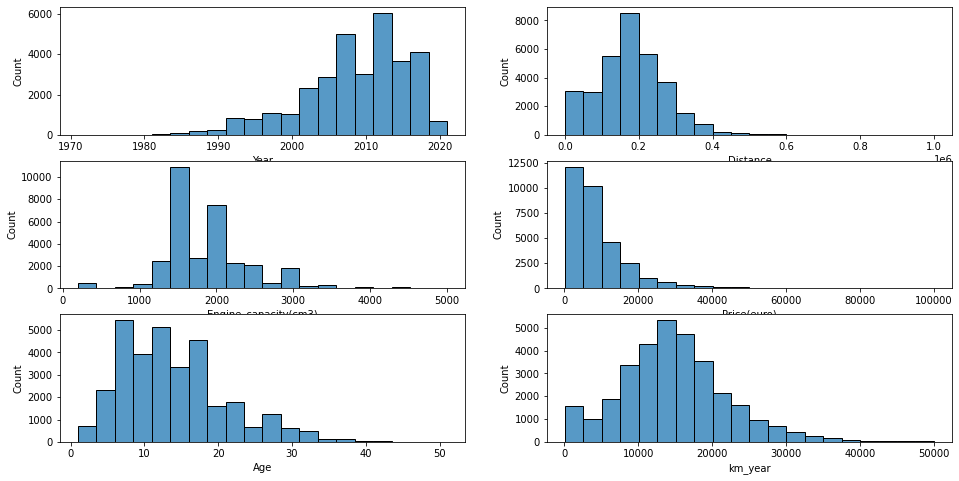

In [78]:
width = 2
height = int(np.ceil(len(num_columns) / width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16, 8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height, width, idx + 1)
    sns.histplot(data=df,x=column_name, bins=20)

Взглянем на зависимость числовых параметров друг от друга

<Figure size 1080x1080 with 0 Axes>

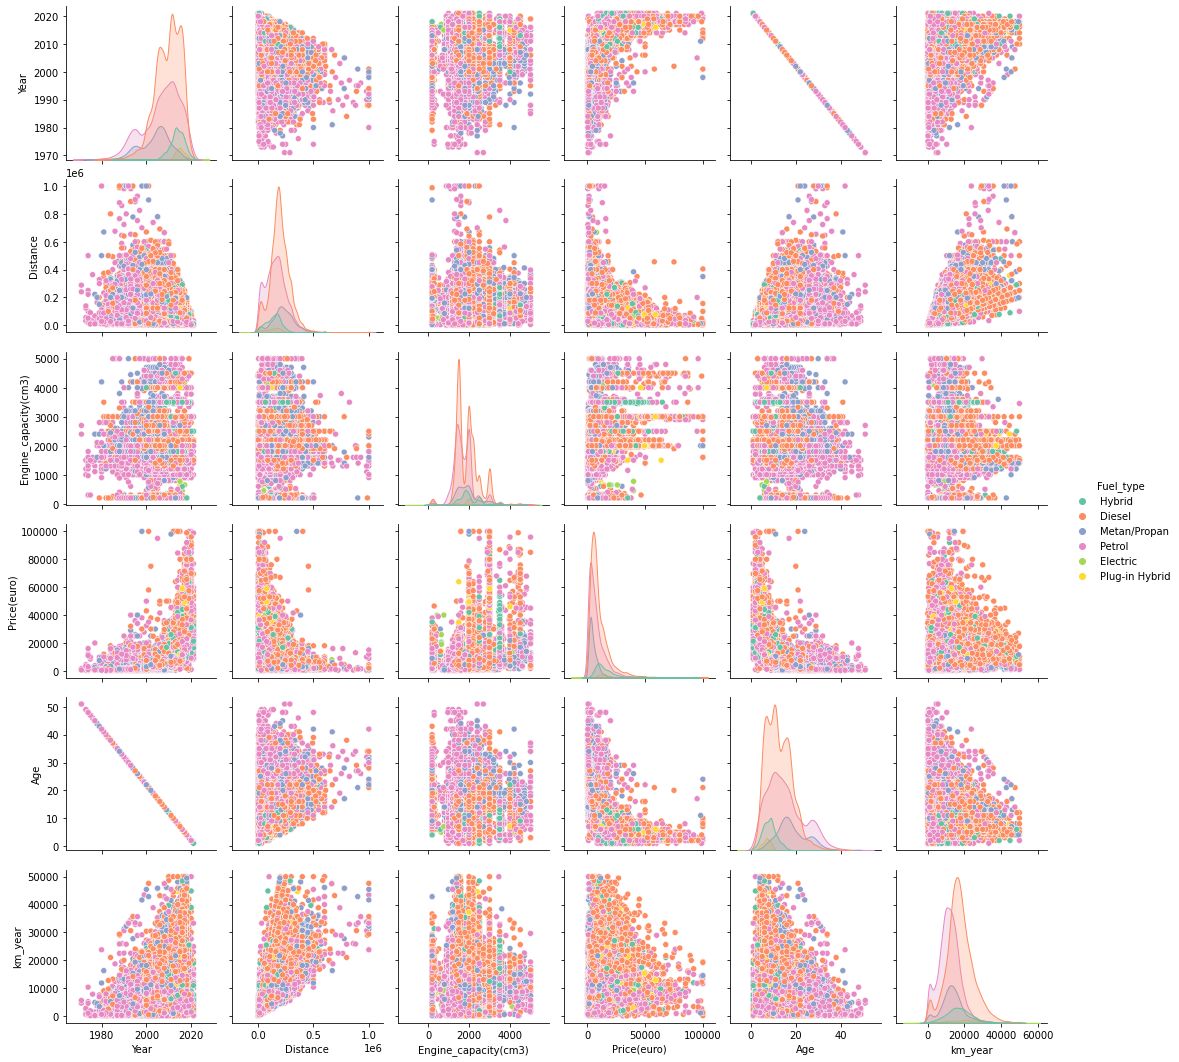

In [79]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, hue ='Fuel_type', palette='Set2'); 

# Предаварительная обработка

### Нормализация

In [80]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns] - Xmin) / ( Xmax - Xmin)

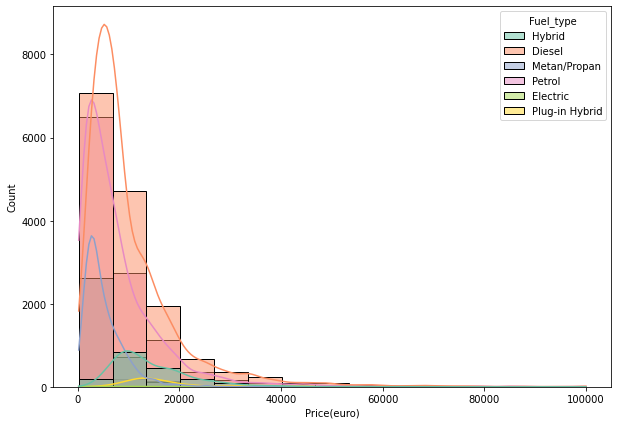

In [81]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=df, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

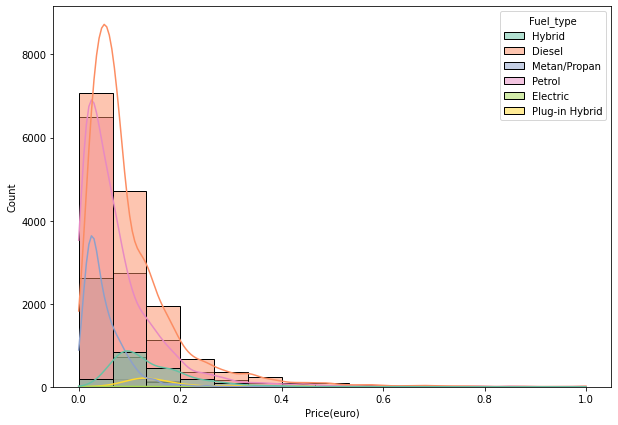

In [82]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=DF_norm, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

### Стандартизация

In [83]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns] - M) / STD

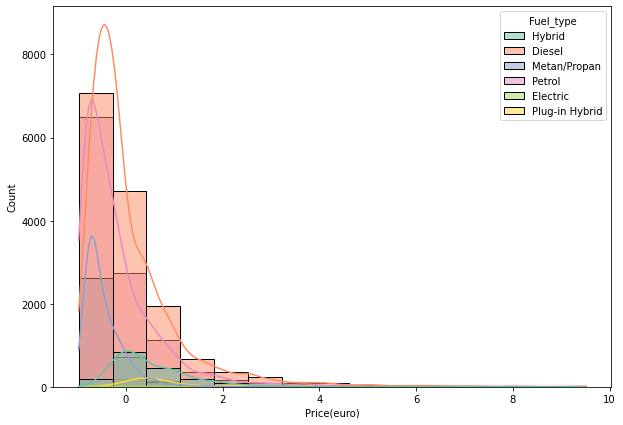

In [84]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=DF_scaled, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

### Логарифмирование, а затем стандартизация

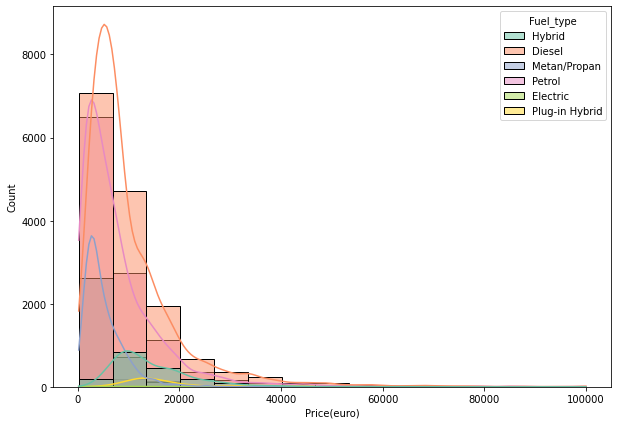

In [85]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data=df, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

In [86]:
DF_power = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns] - M) / STD

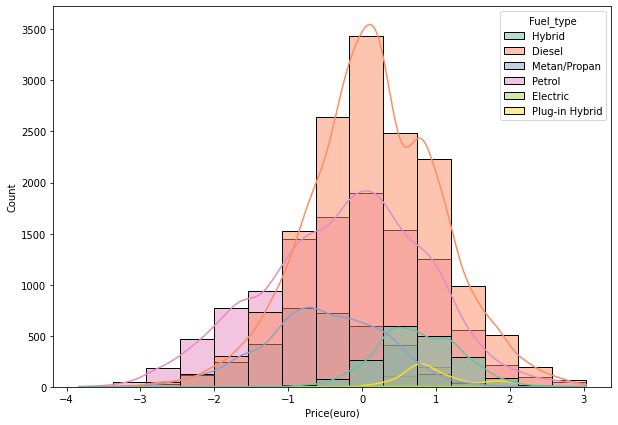

In [87]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data=DF_power, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

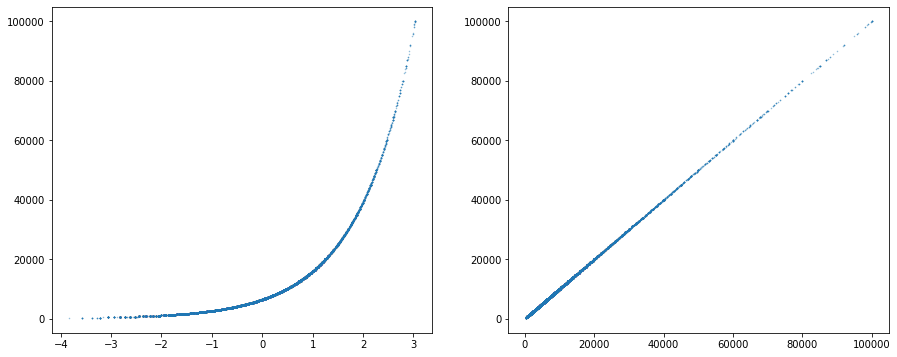

In [88]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(DF_power['Price(euro)'], df['Price(euro)'], '.', alpha=0.5, markersize=1)


plt.subplot(1, 2, 2)
plt.plot(df['Price(euro)'], df['Price(euro)'], '.', alpha=0.5, markersize=1)

# Добавление новых признаков

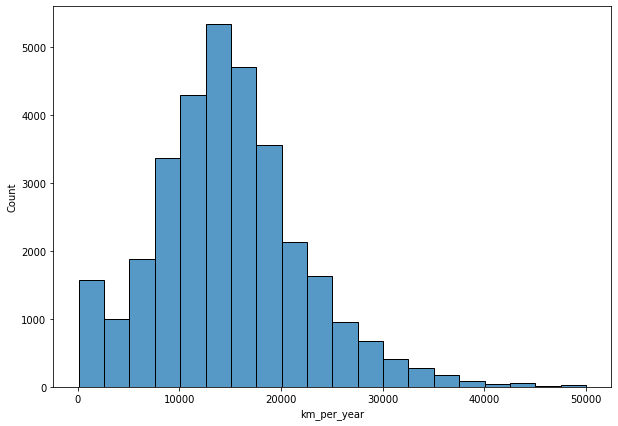

In [89]:
import datetime

current_year = datetime.datetime.now().year

df['Age'] = current_year - df['Year']
df["km_per_year"] = df["Distance"] / df["Age"]


question_km = df[df["km_per_year"] > 5e4]
df = df.drop(question_km.index)


question_km = df[df["km_per_year"] < 100]
df = df.drop(question_km.index)

df = df.reset_index(drop=True)

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='km_per_year', bins=20)

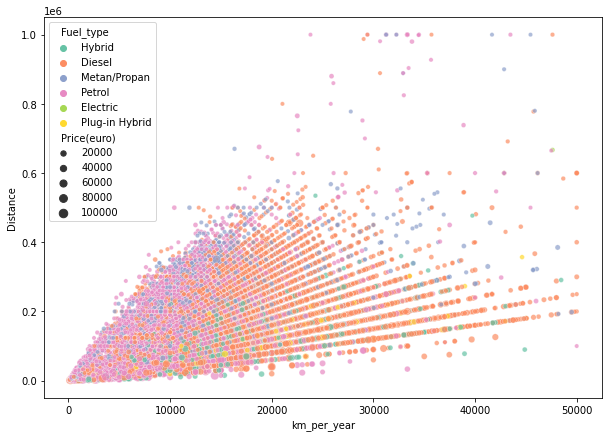

In [90]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="km_per_year", y="Distance", hue="Fuel_type", size="Price(euro)", alpha = 0.7, palette='Set2')

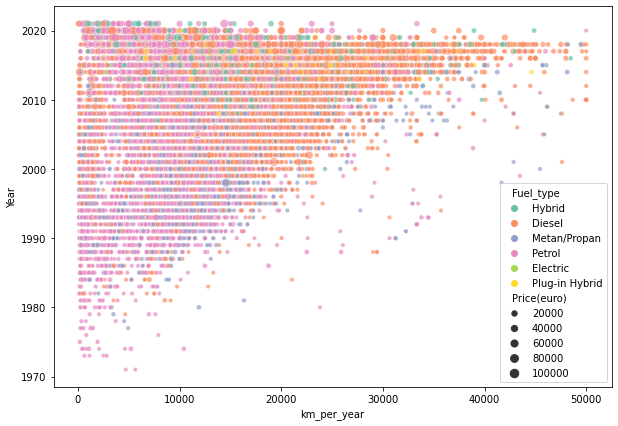

In [91]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="km_per_year", y="Year", hue="Fuel_type", size="Price(euro)", alpha = 0.7, palette='Set2')

### Добавим новый категориальный признак: средний пробег автомобиля в год

In [92]:
km_per_year = lambda x: 'small' if x < 10000 else 'medium' if x < 30000 else 'large'


df['km_per_year_cat'] = df['km_per_year'].apply(km_per_year)

# Удаление аномалий и связанных примеров

In [93]:
num_columns.append('km_per_year')
num_columns

['Year',
 'Distance',
 'Engine_capacity(cm3)',
 'Price(euro)',
 'Age',
 'km_year',
 'km_per_year']

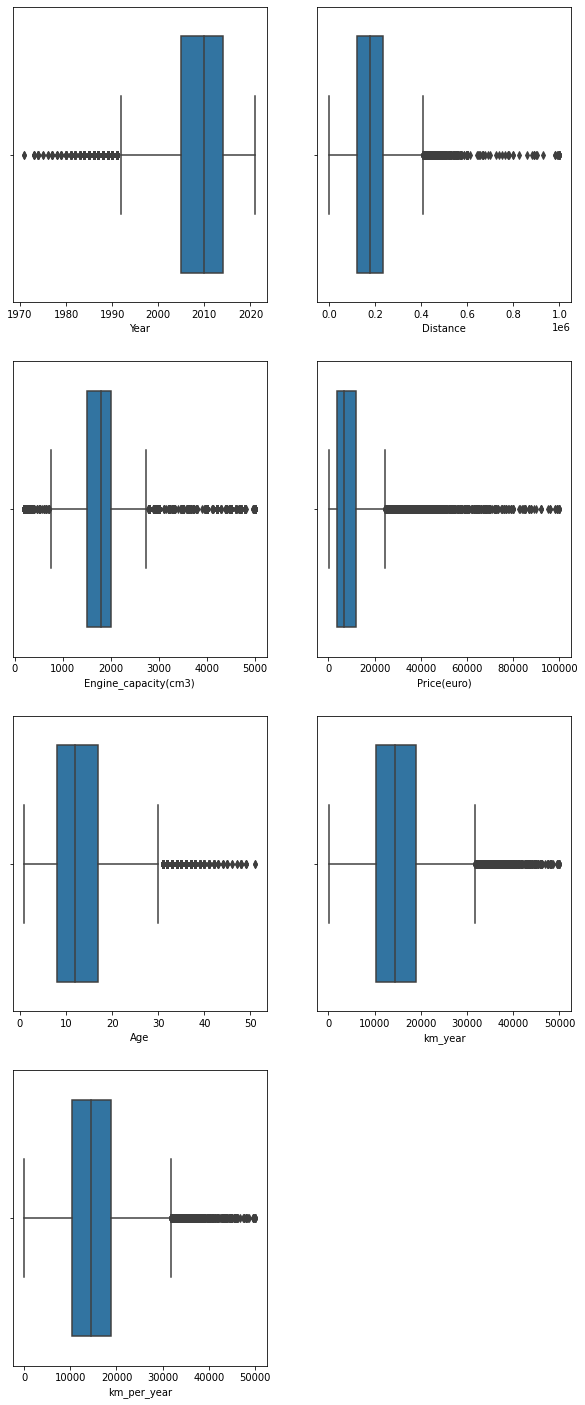

In [94]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):
    plt.subplot(4,2, idx+1)
    sns.boxplot(data=df, x=column_name)

### Взглянем на корреляцию числовых столбцов

In [95]:
cm = sns.light_palette("blue", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

# Категориальные данные

### Число повторений

In [96]:
cat_columns.append('km_per_year_cat')
cat_columns

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'km_per_year_cat']

In [97]:
df[cat_columns].nunique()

Make                44
Model              136
Style               12
Fuel_type            6
Transmission         2
km_per_year_cat      3
dtype: int64

### Исключение редких записей

In [98]:
counts = df.Make.value_counts()

counts

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

In [99]:
counts.median()

290.0

In [100]:
rare = counts[counts < 25]

rare_cheap = df[df.Make.isin(rare.index) & (df["Price(euro)"] <= 25000)].Make.value_counts()
rare_expensive = df[df.Make.isin(rare.index) & (df["Price(euro)"] > 25000)].Make.value_counts()

In [101]:
rare_dict = {}
for i in rare.index:
    print(i)
    
    if i in rare_cheap.index:
        rare_dict[i] = 'Rare_cheap'

    elif i in rare_expensive.index:
        rare_dict[i] = 'Rare_expensive'

    else:
        rare_dict[i] = 'Rare'

df.Make = df.Make.replace(rare_dict)

df.Make.value_counts()

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

In [102]:
df.to_csv("/content/cars_moldova_clear_1.csv", index=False)

# Приведение категориальных признаков к числовым

### Бинарные признакис

In [103]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

### Мноознчные признаки

In [104]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for column in cat_columns:
    df_se[column] = df_se[column].cat.codes

df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  km_per_year           32220 non-null  float64
 12  km_per_year_cat       32220 non-null  int8   
dtypes: float64(5), int16(1), int64(2), int8(5)
memory usage: 1.9 MB


In [105]:
df_se = df.copy()

if 'km_per_year_cat' not in cat_columns:
    cat_columns += ['km_per_year_cat']

df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  km_per_year           32220 non-null  float64
 12  km_per_year_cat       32220 non-null  int8   
dtypes: float64(5), int16(1), int64(2), int8(5)
memory usage: 1.9 MB


In [106]:
df_se.head()

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0    40     92  2011      4  195000.0                1800.0          2   
1    32     62  2014     11  135000.0                1500.0          0   
2    32     71  2012     11  110000.0                1500.0          0   
3    28     23  2006     11  200000.0                1600.0          3   
4    23    126  2000      5  300000.0                2200.0          0   

   Transmission  Price(euro)  Age       km_year   km_per_year  km_per_year_cat  
0             1       7750.0   11  17727.272727  17727.272727                1  
1             0       8550.0    8  16875.000000  16875.000000                1  
2             0       6550.0   10  11000.000000  11000.000000                1  
3             0       4100.0   16  12500.000000  12500.000000                1  
4             0       3490.0   22  13636.363636  13636.363636                1

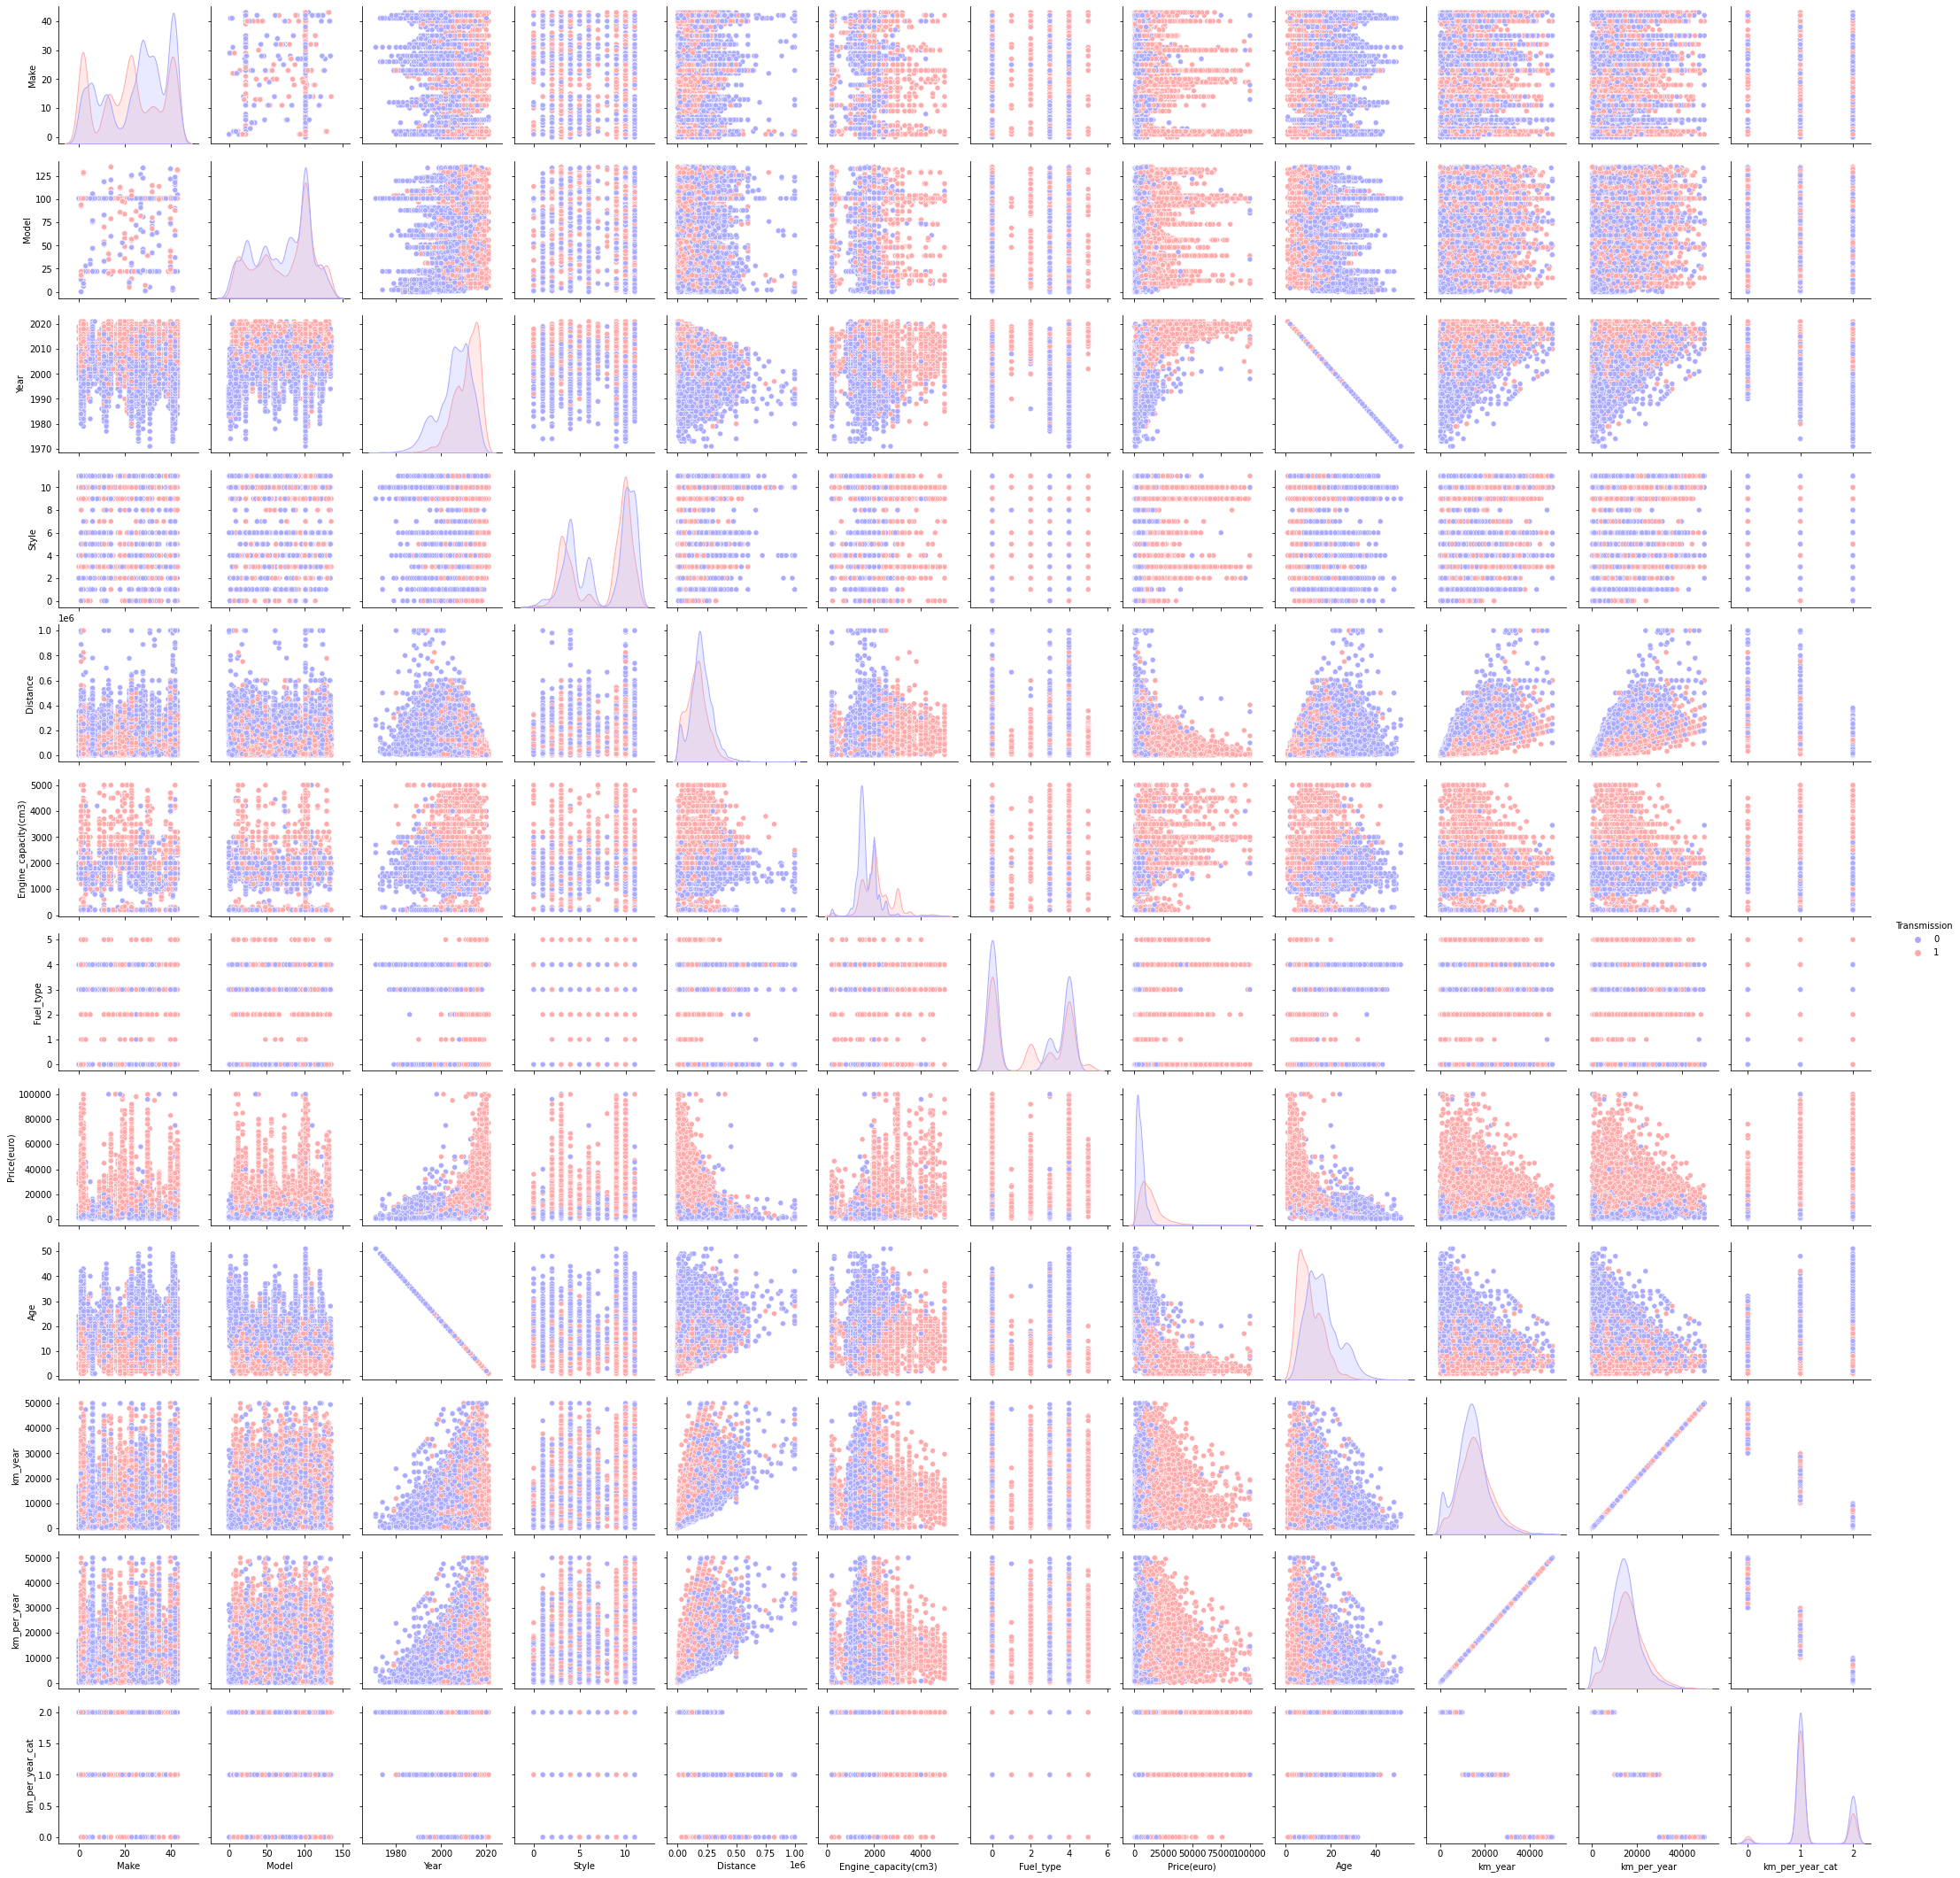

In [107]:
sns.pairplot(data=df_se, hue='Transmission', palette='bwr')

In [108]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

Year  Distance  Engine_capacity(cm3)  Transmission  Price(euro)  Age  \
32215  2016   88000.0                1800.0             1      11500.0    6   
32216  2002  225000.0                1800.0             0       4400.0   20   
32217  2015   89000.0                1500.0             0       7000.0    7   
32218  2006  370000.0                2000.0             0       4000.0   16   
32219  2006  300000.0                1500.0             0       4000.0   16   

            km_year   km_per_year  Make_Alfa Romeo  Make_Audi  ...  \
32215  14666.666667  14666.666667                0          0  ...   
32216  11250.000000  11250.000000                0          0  ...   
32217  12714.285714  12714.285714                0          0  ...   
32218  23125.000000  23125.000000                0          0  ...   
32219  18750.000000  18750.000000                0          0  ...   

       Style_Universal  Fuel_type_Diesel  Fuel_type_Electric  \
32215                0                 0                   0   
32216                0                 0                   0   
32217                1                 1                   0   
32218                0                 1                   0   
32219                0                 1                   0   

       Fuel_type_Hybrid  Fuel_type_Metan/Propan  Fuel_type_Petrol  \
32215                 0                       0                 1   
32216                 0                       1                 0   
32217                 0                       0                 0   
32218                 0                       0                 0   
32219                 0                       0                 0   

       Fuel_type_Plug-in Hybrid  km_per_year_cat_large  \
32215                         0                      0   
32216                         0                      0   
32217                         0                      0   
32218                         0                      0   
32219                         0                      0   

       km_per_year_cat_medium  km_per_year_cat_small  
32215                       1                      0  
32216                       1                      0  
32217                       1                      0  
32218                       1                      0  
32219                       1                      0  

[5 rows x 209 columns]

In [109]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 209 entries, Year to km_per_year_cat_small
dtypes: float64(5), int64(3), uint8(201)
memory usage: 8.1 MB


# ИИИ сохраняем

In [110]:
df_se.to_csv("/content/cars_moldova_cat_num.csv", index=False)
df_ohe.to_csv("/content/cars_moldova_onehot.csv", index=False)